ref: https://www.janisklaise.com/post/rl-policy-gradients/

plain logistic regression

In [1]:
import gym
env = gym.make('CartPole-v0')

In [2]:
import numpy as np

class LogisticPolicy():
    
    def __init__(self, θ, α, γ):
        self.θ = θ # parameters
        self.α = α # learning rate
        self.γ = γ # discount factor
        
    def logistic(self, y):
        # definition of logistic function
        return 1/(1 + np.exp(-y))
    
    def probs(self, x):
        # continuous state x
        
        # returns probabilities of two actions
        y = x @ self.θ
        prob0 = self.logistic(y)
        
        return np.array([prob0, 1-prob0])
    
    def act(self, x):
        # sample an action in proportion to probs
        probs = self.probs(x)
        # discrete action
        action = np.random.choice([0, 1], p=probs)
        
        return action, probs[action]
    
    def grad_log_p(self, x):
        # calculate grad-log-probs
        y = x @ self.θ
        grad_log_p0 = x - x*self.logistic(y)
        grad_log_p1 = - x*self.logistic(y)
        
        return grad_log_p0, grad_log_p1
    
    def grad_log_p_dot_rewards(self, grad_log_p, actions, discounted_rewards):
        # dot grads with future rewards for each action in episode
        return grad_log_p.T @ discounted_rewards
    
    def discount_rewards(self, rewards):
        # calculate temporally adjusted, discounted rewards
        discounted_rewards = np.zeros(len(rewards))
        cumulative_rewards = 0
        for i in reversed(range(0, len(rewards))):
            cumulative_rewards = cumulative_rewards * self.γ + rewards[i]
            discounted_rewards[i] = cumulative_rewards
            
        return discounted_rewards
    
    def update(self, rewards, obs, actions):
        # calculate gradients for each action over all observations
        grad_log_p = np.array([self.grad_log_p(ob)[action] for ob, action in zip(obs, actions)])
        
        assert grad_log_p.shape == (len(obs), 4)
        
        # calculate temporally adjusted, discounted rewards
        discounted_rewards = self.discount_rewards(rewards)
        
        # gradients times rewards
        dot = self.grad_log_p_dot_rewards(grad_log_p, actions, discounted_rewards)
        
        # gradient ascent on parameters
        self.θ += self.α*dot

In [3]:
def run_episode(env, policy, render=False):
    observation = env.reset()
    totalreward = 0
    
    observations = []
    actions = []
    rewards = []
    probs = []
    
    done = False
    
    while not done:
        if render:
            env.render()
            
        observations.append(observation)
        
        action, prob = policy.act(observation)
        observation, reward, done, info = env.step(action)
        
        totalreward += reward
        rewards.append(reward)
        actions.append(action)
        probs.append(prob)
        
    return totalreward, np.array(rewards), np.array(observations), np.array(actions), np.array(probs)

In [4]:
def train(θ, α, γ, Policy, MAX_EPISODES=1000, seed=None, evaluate=False):
    # initialize environment and policy
    env = gym.make('CartPole-v0')
    if seed is not None:
        env.seed(seed)
    episode_rewards = []
    policy = Policy(θ, α, γ)
    
    # train until MAX_EPISODES
    for i in range(MAX_EPISODES):
        # run a single episode
        total_reward, rewards, observations, actions, probs = run_episode(env, policy)
        
        # keep track of episode rewards
        episode_rewards.append(total_reward)
        
        # update policy
        policy.update(rewards, observations, actions)
        print("EP: {} Score: {}".format(i, total_reward), end="\r", flush=False)
        
    if evaluate:
        env = Monitor(env, 'pg_cartpole', video_callable=False, force=True)
        for _ in range(100):
            run_episode(env, policy, render=False)
        env.env.close()
        
    return episode_rewards, policy

In [10]:
from gym.wrappers.monitor import Monitor, load_results

# for reproducibility
GLOBAL_SEED = 0
np.random.seed(GLOBAL_SEED)

episode_rewards, policy = train(
    θ=np.random.rand(4),
    α=0.002,
    γ=0.99,
    Policy=LogisticPolicy,
    MAX_EPISODES=2000,
    seed=GLOBAL_SEED,
    evaluate=True
)

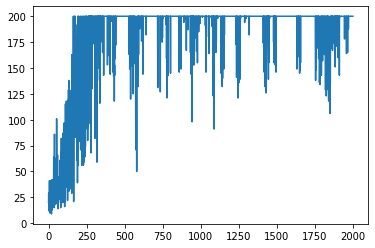

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(episode_rewards)

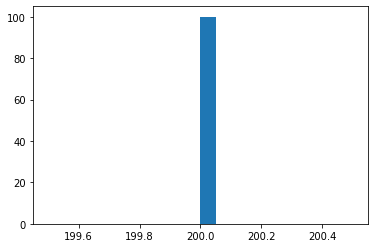

In [12]:
results = load_results('pg_cartpole')
plt.hist(results['episode_rewards'], bins=20);

<h1> Debug </h1>

In [6]:
θ = np.random.rand(4)
α = 0.002
γ = 0.99
MAX_EPISODES = 2000
evaluate = True

# initialize environment and policy
env = gym.make('CartPole-v0')
env.seed(0)
    
episode_rewards = []
policy = LogisticPolicy(θ, α, γ)

# run a single episode
total_reward, rewards, observations, actions, probs = run_episode(env, policy)

# keep track of episode rewards
episode_rewards.append(total_reward)

# update policy
# policy.update(rewards, observations, actions)


In [ ]:
import numpy as np

class LogisticPolicy():
    
    def __init__(self, θ, α, γ):
        self.θ = θ # parameters
        self.α = α # learning rate
        self.γ = γ # discount factor
        
    def logistic(self, y):
        # definition of logistic function
        return 1/(1 + np.exp(-y))
    
    def probs(self, x):
        # continuous state x
        
        # returns probabilities of two actions
        y = x @ self.θ
        prob0 = self.logistic(y)
        
        return np.array([prob0, 1-prob0])
    
    def act(self, x):
        # sample an action in proportion to probs
        probs = self.probs(x)
        # discrete action
        action = np.random.choice([0, 1], p=probs)
        
        return action, probs[action]
    
    def grad_log_p(self, x):
        # calculate grad-log-probs
        y = x @ self.θ
        grad_log_p0 = x - x*self.logistic(y)
        grad_log_p1 = - x*self.logistic(y)
        
        return grad_log_p0, grad_log_p1
    
    def grad_log_p_dot_rewards(self, grad_log_p, actions, discounted_rewards):
        # dot grads with future rewards for each action in episode
        return grad_log_p.T @ discounted_rewards
    
    def discount_rewards(self, rewards):
        # calculate temporally adjusted, discounted rewards
        discounted_rewards = np.zeros(len(rewards))
        cumulative_rewards = 0
        for i in reversed(range(0, len(rewards))):
            cumulative_rewards = cumulative_rewards * self.γ + rewards[i]
            discounted_rewards[i] = cumulative_rewards
            
        return discounted_rewards
    
    def update(self, rewards, obs, actions):
        # calculate gradients for each action over all observations
        grad_log_p = np.array([self.grad_log_p(ob)[action] for ob, action in zip(obs, actions)])
        
        assert grad_log_p.shape == (len(obs), 4)
        
        # calculate temporally adjusted, discounted rewards
        discounted_rewards = self.discount_rewards(rewards)
        
        # gradients times rewards
        dot = self.grad_log_p_dot_rewards(grad_log_p, actions, discounted_rewards)
        
        # gradient ascent on parameters
        self.θ += self.α*dot

In [13]:
rewards.shape, rewards

((18,),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.]))

In [14]:
observations.shape, observations

((18, 4), array([[-0.04456399,  0.04653909,  0.01326909, -0.02099827],
        [-0.04363321,  0.24146826,  0.01284913, -0.30946528],
        [-0.03880385,  0.04616562,  0.00665982, -0.01275795],
        [-0.03788053, -0.14905121,  0.00640466,  0.28201876],
        [-0.04086156,  0.0459788 ,  0.01204504, -0.0086373 ],
        [-0.03994198,  0.24092596,  0.01187229, -0.29749566],
        [-0.03512346,  0.43587668,  0.00592238, -0.58641075],
        [-0.02640593,  0.63091518, -0.00580583, -0.87722221],
        [-0.01378763,  0.43587261, -0.02335028, -0.5863702 ],
        [-0.00507017,  0.63131369, -0.03507768, -0.88631626],
        [ 0.0075561 ,  0.82689382, -0.05280401, -1.1898167 ],
        [ 0.02409398,  0.63249447, -0.07660034, -0.91414128],
        [ 0.03674387,  0.82856429, -0.09488317, -1.22988206],
        [ 0.05331515,  0.63478241, -0.11948081, -0.96837051],
        [ 0.0660108 ,  0.44144967, -0.13884822, -0.71548274],
        [ 0.07483979,  0.63819253, -0.15315787, -1.04844721],

In [15]:
actions.shape, actions

((18,), array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]))